In [1]:
import torch
%matplotlib inline
import matplotlib.pyplot as plt
from Models.MLP import MLP
import numpy as np

In [ ]:
scheduler1 = torch.optim.lr_scheduler.LinearLR(
    torch.optim.Adam(MLP(1,).parameters()),
    total_iters= 20,
    start_factor = 1e-3
)
scheduler2 = torch.optim.lr_scheduler.LinearLR(
    torch.optim.Adam(MLP(1,).parameters()),
    total_iters= 40,
    start_factor = 1e-3
)
scheduler3 = torch.optim.lr_scheduler.StepLR(
    torch.optim.Adam(MLP(1,).parameters()),
    step_size = 20,
    gamma = 0.5
)

lr1 = []
lr2 = []
lr3 = []
for i in range(100):
    lr1.append(scheduler1.get_last_lr())
    scheduler1.step()

    lr2.append(scheduler2.get_last_lr())
    scheduler2.step()

    lr3.append(scheduler3.get_last_lr())
    scheduler3.step()

/home/florenthervers/miniconda3/envs/TFE/lib/python3.9/site-packages/torch/optim/lr_scheduler.py:216: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  warnings.warn(


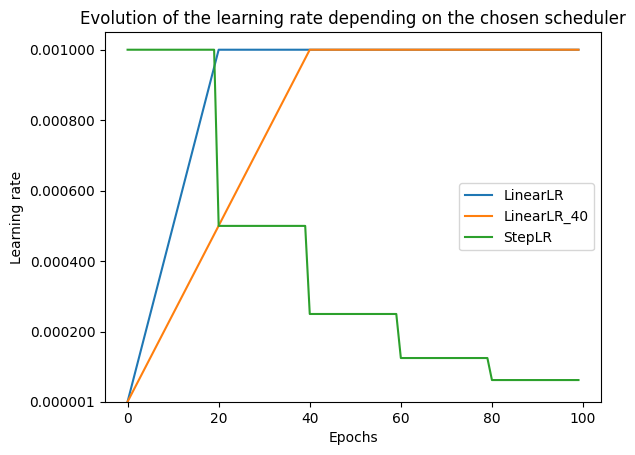

In [ ]:
plt.plot(np.arange(0,100),lr1,  label="LinearLR")
plt.plot(np.arange(0,100),lr2,  label="LinearLR_40")
plt.plot(np.arange(0,100),lr3,  label="StepLR")
plt.ylabel("Learning rate")
plt.xlabel("Epochs")
plt.ylim(bottom=1e-6)
plt.yticks([1e-3,8e-4,6e-4,4e-4,2e-4,1e-6])
plt.legend()
plt.title("Evolution of the learning rate depending on the chosen lr_scheduler")
plt.show()